In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bidi import algorithm as bidialg
import arabic_reshaper
matplotlib.rcParams['text.latex.unicode'] = True
plt.rcParams["font.family"] = "Roboto"
plt.style.use('ggplot')
%matplotlib inline

In [136]:
#2018 
df_2018_stem_clean = pd.read_excel("sorted_data/Master_STEM_clean.xlsx", sheet_name='2018')
df_2018_stem_clean.tail(10)

,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
15136,كويتي,بنات,التعليم الخاص,خاص,النجاة النموذجية الثانوية للبنات,91.63
15137,كويتي,بنات,التعليم الخاص,خاص,النجاة النموذجية الثانوية للبنات,82.38
15138,كويتي,بنات,التعليم الخاص,خاص,النجاة النموذجية الثانوية للبنات,85.47
15139,مصري,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,85.70
15140,كويتي,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,95.93
15141,سوري,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,91.44
15142,مصري,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,96.94
15143,مصري,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,99.81
15144,سوري,بنات,التعليم الخاص,خاص,الفحيحيل النموذجية الثانوية - بنات - المشتركة,94.86
15145,كويتي,بنين,التربية الخاصة,مراكــز,مركز الرجاء الثانوي رجال,77.84


In [137]:
# Disection
df_2018_stem_local = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنسية'] == u'كويتي']
df_2018_stem_expat = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنسية'] != u'كويتي']

df_2018_stem_male = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنس'] == u'بنين']
df_2018_stem_female = df_2018_stem_clean.loc[df_2018_stem_clean[u'الجنس'] != u'بنين']

df_2018_stem_male_local = df_2018_stem_male.loc[df_2018_stem_male[u'الجنسية'] == u'كويتي']
df_2018_stem_male_expat = df_2018_stem_male.loc[df_2018_stem_male[u'الجنسية'] != u'كويتي']

df_2018_stem_female_local = df_2018_stem_female.loc[df_2018_stem_female[u'الجنسية'] == u'كويتي']
df_2018_stem_female_expat = df_2018_stem_female.loc[df_2018_stem_female[u'الجنسية'] != u'كويتي']

display(df_2018_stem_local.head(10))
display(df_2018_stem_expat.head(10))
display(df_2018_stem_male.head(10))
display(df_2018_stem_female.head(10))

,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
0,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,66.29
1,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,93.92
2,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,80.09
3,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,85.89
4,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,86.68
5,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.06
6,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,73.95
7,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,87.40
9,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,86.90
10,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,84.62


,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
8,يمني,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,91.76
41,مصري,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,99.85
65,مصري,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,97.25
77,مصري,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,99.17
78,غير محدد الجنسية,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,90.68
82,مصري,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,94.80
160,يمني,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,75.35
161,صومالي,بنين,العاصمة,حكــومى,عبدالله العتيبي الثانوية للبنين,85.66
166,سعودي,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,78.87
173,يمني,بنين,العاصمة,حكــومى,عيسى أحمد الحمد الثانوية للبنين,76.45


,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
0,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,66.29
1,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,93.92
2,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,80.09
3,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,85.89
4,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,86.68
5,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,94.06
6,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,73.95
7,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,87.40
8,يمني,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,91.76
9,كويتي,بنين,العاصمة,حكــومى,يوسف بن عيسى الثانوية للبنين,86.90


,الجنسية,الجنس,المنطقة التعليمية,حكومي/خاص,المدرسة,النسبة
835,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,80.06
836,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,78.20
837,غير محدد الجنسية,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,68.90
838,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,81.80
839,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,68.90
840,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,88.97
841,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,86.70
842,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,76.83
843,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,90.35
844,كويتي,بنات,العاصمة,حكــومى,أم حبيب بنت العاص القرشية الثانوية,69.83


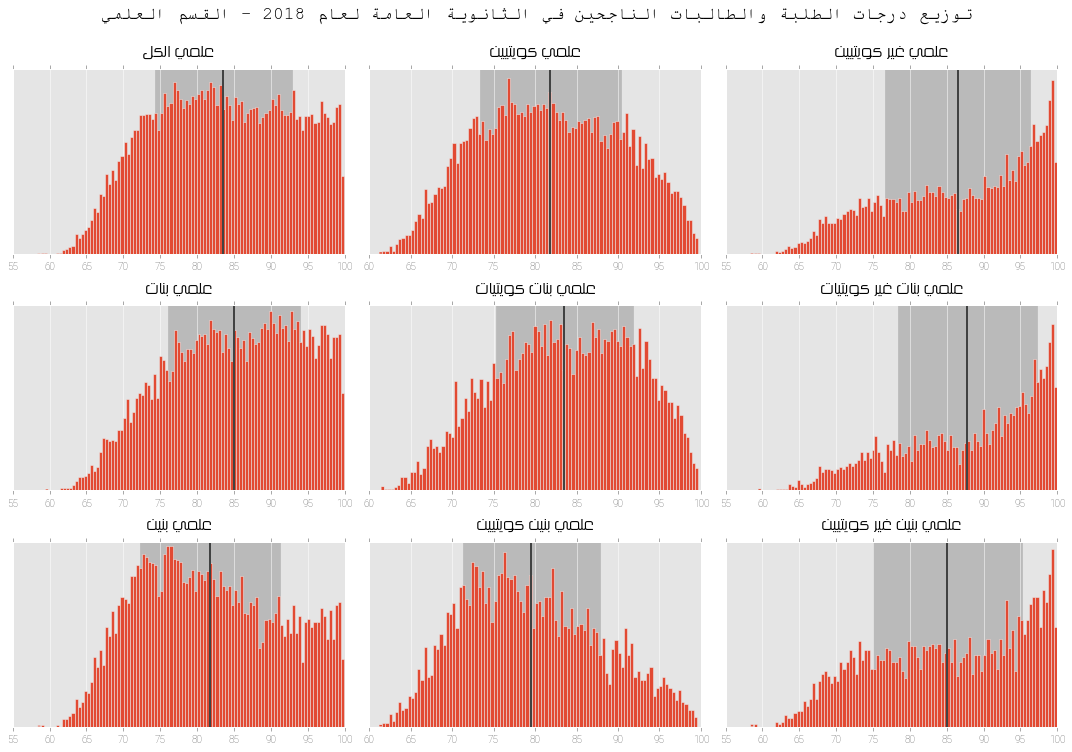

In [131]:
def arabic_text(utext):
    reshaped_text = arabic_reshaper.reshape(utext)
    return bidialg.get_display(reshaped_text)
ncols_ = 3
nrows_ = 3
fig, axes = plt.subplots(figsize=(15, 10), nrows=nrows_, ncols=ncols_)
axes = axes.flatten()

dissection_plot_list_2018 = [[df_2018_stem_clean, u'علمي الكل'], 
                            [df_2018_stem_local, u'علمي كويتيين'], 
                            [df_2018_stem_expat, u'علمي غير كويتيين'],
                            [df_2018_stem_female, u'علمي بنات'], 
                            [df_2018_stem_female_local, u'علمي بنات كويتيات'], 
                            [df_2018_stem_female_expat, u'علمي بنات غير كويتيات'],
                            [df_2018_stem_male,  u'علمي بنين'], 
                            [df_2018_stem_male_local, u'علمي بنين كويتيين'], 
                            [df_2018_stem_male_expat, u'علمي بنين غير كويتيين']]

for k, df_pair in enumerate(dissection_plot_list_2018):
    desc = df_pair[0][u'النسبة'].describe()
    df_pair[0][u'النسبة'].plot.hist(stacked=True , bins=100, ax=axes[k]) #2016 Color: 815eff, 2017 color: ffd260
    axes[k].set_title(arabic_text(df_pair[1]), fontname='KacstTitle', y=1.04)
    axes[k].axvline(x=desc['mean'], color='#414242', lw=2)
    axes[k].axvspan(desc['mean'] - desc['std'], desc['mean'] + desc['std'], alpha=0.5, color='#919191', zorder=0)
    axes[k].get_yaxis().set_visible(False)

fig.suptitle(arabic_text(u'توزيع درجات الطلبة والطالبات الناجحين في الثانوية العامة لعام 2018 - القسم العلمي'), fontname='Courier New',fontsize=18, y=1.04)
fig.tight_layout()

In [132]:
fig.savefig("Figures/2018histogram.svg", bbox_inches='tight')
